In [297]:
import matplotlib.pyplot as plt
import csv
import operator as op
import math
from matplotlib.colors import LinearSegmentedColormap

class CsvReaderHeading:
    def __init__(self, file, **csvreader_kwargs):
        self.reader = csv.reader(file, **csvreader_kwargs)
        self.header = next(self.reader)
        self.indices = range(len(self.header))

    def __iter__(self):
        return self
        
    def __next__(self):
        as_list = next(self.reader)
        return { self.header[i]: as_list[i] for i in self.indices }

class CsvTable:
    def __init__(self, itr):
        self.itr = itr
    
    def populate(self):
        self.rows = list(self.itr)
        self.keys = self.rows[0].keys()
    
    @property
    def cols(self):
        return { k: [ int(row[k]) for row in self.rows ] for k in self.keys }
    
    @property
    def freqs(self):
        return {k: frequencies(self.cols[k]) for k in self.keys }

def frequencies(xs):
    result = {}
    for x in xs:
        if x not in result:
            result[x] = 0
        result[x] += 1
    return result

In [132]:
table = None
with open("log.csv", "r") as f:
    reader = CsvReaderHeading(f)
    table = CsvTable(reader)
    table.populate()

In [373]:
def plot_histogram(x, xlabel, title, lines=None, ax=plt, color="darkblue", log=False):
    freqs = frequencies(x)
    items = list(freqs.keys())
    items.sort()
    values = [ freqs[item] for item in items ]
    ax.bar(
        items, values,
        color=color,
    )
    if log:
        ax.yscale("log")
    ax.xlabel(xlabel)
    ax.ylabel("Frequency")
    ax.title(title)
    if lines == None:
        lines = []
    for (line, color) in lines:
        height = max(values)
        start = min(items)
        ax.axline([line, 0], [line, height], color=color, linewidth=3, linestyle="dashed")
    if ax is plt:
        ax.show()
        
def plot_diffhist(table, key1, key2, title):
    zero_color = (0., 0., 0., 0.1)
    cmap_pos = LinearSegmentedColormap.from_list("diffhistpos", [zero_color, "green"])
    cmap_neg = LinearSegmentedColormap.from_list("diffhistneg", [zero_color, "red"])
    power = 1
    def cmap(item):
        if abs(item) < 1e-6:
            return zero_color
        elif item < 0.:
            return cmap_neg((-item) ** power)
        else:
            return cmap_pos(item ** power)
    plot_histogram(
        map(op.sub, table.cols[key1], table.cols[key2]),
        f"{key1} minus {key2}",
        f"{title}: {key1} vs {key2}",
        lines=[(0, "black")],
        cmap=cmap,
        log=False,
    )

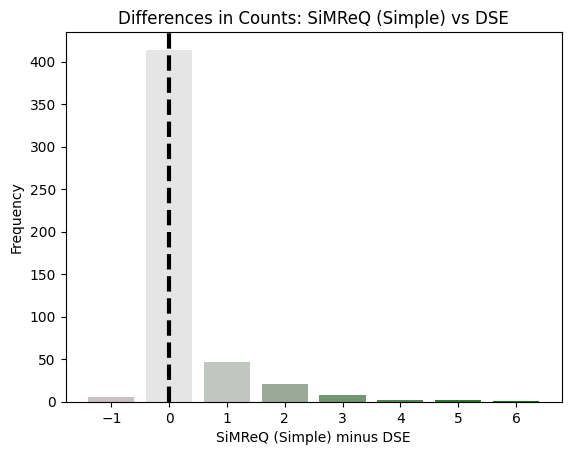

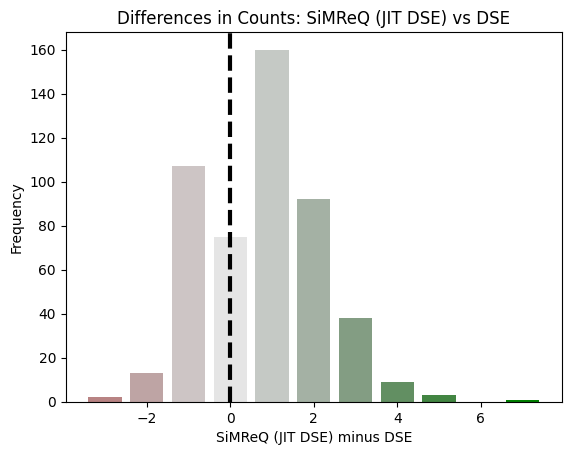

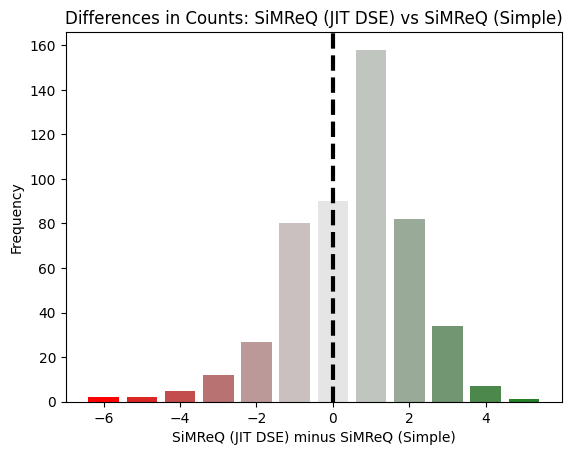

In [374]:
difftitle = "Differences in Counts"
plot_diffhist(table, "SiMReQ (Simple)", "DSE", difftitle)
plot_diffhist(table, "SiMReQ (JIT DSE)", "DSE", difftitle)
plot_diffhist(table, "SiMReQ (JIT DSE)", "SiMReQ (Simple)", difftitle)

Text(0.5, 1.0, 'Total Detections by Algorithm')

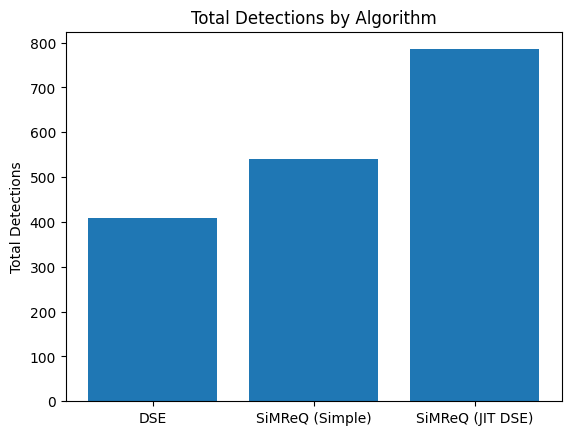

In [241]:
sums = { k: sum(v) for (k, v) in table.cols.items() }
items = ["DSE", "SiMReQ (Simple)", "SiMReQ (JIT DSE)"]
plt.bar(items, [ sums[i] for i in items ])
plt.ylabel("Total Detections")
plt.title("Total Detections by Algorithm")